In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('F:/DEEPTI/YoutubeLectures-master/YoutubeLectures-master/Movie KNN/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings=pd.read_csv('F:/DEEPTI/ratings_small.csv')
ratings=ratings.iloc[:,0:3]
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [4]:
ratings.shape

(100004, 3)

In [5]:
movies_users=ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)
movies_users.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

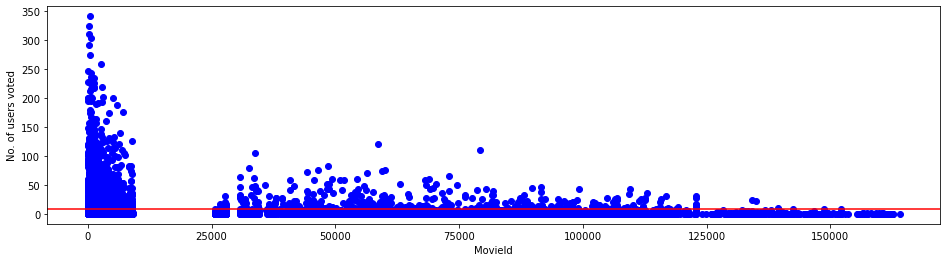

In [7]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='b')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [8]:
movies_users = movies_users.loc[no_user_voted[no_user_voted > 10].index,:]

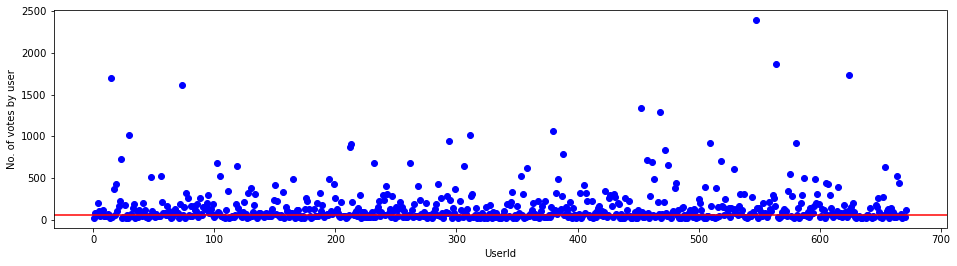

In [9]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='b')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [10]:
movies_users=movies_users.loc[:,no_movies_voted[no_movies_voted > 50].index]
movies_users

userId,2,3,4,5,7,8,12,13,15,17,...,655,656,658,659,660,662,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [12]:
from scipy.sparse import csr_matrix

In [13]:
mat_movies=csr_matrix(movies_users.values)


In [14]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model.fit(mat_movies)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [15]:
import pickle

In [16]:
dbfile = open('example_pickle', 'ab')
pickle.dump(model, dbfile, protocol=3)                     
dbfile.close()


In [17]:
dbfile2 = open('mat_movie_pickle', 'ab')
pickle.dump(mat_movies, dbfile2, protocol=3)                     
dbfile2.close()


In [18]:
from fuzzywuzzy import process

F:\DEEPTI\Anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [21]:
def recommender(movie_name,data,n):
    res=process.extractOne(movie_name, movies['title'])
    print(res)
    idx=res[2]
    print('Movie Selected : ',movies['title'][idx], 'Index: ',idx)
    print('Searching for recommendation.....')
    distance, indices = model.kneighbors(data[idx], n_neighbors=n)
    for i in indices :
        print(movies['title'][i].where(i!=idx))
    

In [22]:
recommender('jum', mat_movies,10)

('Jumanji (1995)', 90, 1)
Movie Selected :  Jumanji (1995) Index:  1
Searching for recommendation.....
1                                     NaN
249           Natural Born Killers (1994)
191               Don Juan DeMarco (1995)
295    What's Eating Gilbert Grape (1993)
289                      Tom & Viv (1994)
166                        Species (1995)
82             Vampire in Brooklyn (1995)
193                      Drop Zone (1994)
239         Miracle on 34th Street (1994)
287         Star Trek: Generations (1994)
Name: title, dtype: object


## 